In [1]:
!nvidia-smi

Fri Sep  1 10:19:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#install Supervision
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.5 MB/s eta 0:00:00


In [4]:
import cv2

IMAGE_PATH = "/content/fire_image.png"

image = cv2.imread(IMAGE_PATH)

In [5]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.8/613.8 kB 7.2 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO
import supervision as sv

model = YOLO('best.pt')
result = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(result)

In [7]:
"detections", len(detections)

('detections', 2)

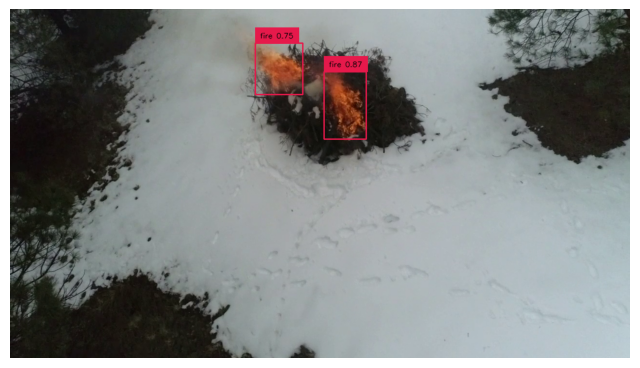

In [8]:
box_annotator = sv.BoxAnnotator()

labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]
annotated_image = box_annotator.annotate(image.copy(), detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(8, 8))